In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import subprocess
from datetime import datetime
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import pickle
import sys
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from bayes_opt import bayesian_optimization as BayesianOptimization

# 1. Comparing run time between Sklearn and Top N LOF

In [2]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_1'

In [3]:
#set the mean and standard deviation of the gaussian distribution
mu, sigma = 0, 1
#number of rows
size = 90000

In [4]:
#dimensions to test are 2, 10, 20
for dim in [2, 10, 20]:
    s = np.random.normal(mu, sigma, (size, dim))
    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = False)

In [5]:
#run top n lof with c = 2, d = 2/10/20, k = 2, n = 90000, r = 2
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 2 -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_1\\dim_{dim}.csv -k 2 -n 90000 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_1\\dim_{dim} -r 2", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master', stdout = subprocess.PIPE)
    
    for line in iter(p.stdout.readline, ''): 
        if not line:
            break
        print(line.decode('utf-8'))

Set Arguments.......

K = 2

Top-N = 90000

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\synthetic_1\dim_2.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\synthetic_1\dim_2

Dim =  2

Domain Range =  2.0

Cluster Radius Rate =  2.0

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 3

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 0 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 0

Number of Pruned Points: 0

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points............

...............Start Com

In [6]:
#run top n lof  with c = 1, d = 2/10/20, k = 20, n = 90000, r = 1
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 1 -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_1\\dim_{dim}.csv -k 20 -n 90000 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_1\\dim_{dim} -r 1", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master', stdout = subprocess.PIPE)
    
    for line in iter(p.stdout.readline, ''): 
        if not line:
            break
        print(line.decode('utf-8'))

Set Arguments.......

K = 20

Top-N = 90000

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\synthetic_1\dim_2.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\synthetic_1\dim_2

Dim =  2

Domain Range =  1.0

Cluster Radius Rate =  1.0

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 57

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 0 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 0

Number of Pruned Points: 0

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points............

...............Start C

In [7]:
#sklearn lof
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    lof = LocalOutlierFactor()

    start = datetime.now()
    lof.fit_predict(df)
    stop = datetime.now()
    
    time_diff = round((stop - start).total_seconds(), 1)
    print(f"Time taken for {dim} dimensions: {time_diff}")

Time taken for 2 dimensions: 0.4
Time taken for 10 dimensions: 36.9
Time taken for 20 dimensions: 104.8


# 2. What if anomalies are introduced?

In [8]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_2'

In [9]:
#set the mean and standard deviation of the gaussian distribution for inliers
mu, sigma = 0, 1
#set the mean and standard deviation of the gaussian distribution for outliers
mu2, sigma2 = 10, 10
#number of rows
size = 90000
num_anomalies = int(0.001 * size)
num_inliers = size - num_anomalies

In [10]:
#set dim to 2 to visualise the outcome
dim = 2

#create the dataset
inliers = np.random.normal(mu, sigma, (num_inliers, dim))
outliers = np.random.normal(mu2, sigma2, (num_anomalies, dim))
s = np.concatenate([inliers, outliers])
labels = [0] * num_inliers + [1] * num_anomalies

df = pd.DataFrame(s)
df.to_csv(os.path.join(OUTPUT_DIR, 'dim_2_visualise.csv'), header = False)

with open(os.path.join(OUTPUT_DIR, 'label_2_visualise.pickle'), 'wb') as handle:
        pickle.dump(labels, handle)

In [11]:
#to load the df and labels
data = pd.read_csv(os.path.join(OUTPUT_DIR, 'dim_2_visualise.csv'), header = None)

with open(os.path.join(OUTPUT_DIR, 'label_2_visualise.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

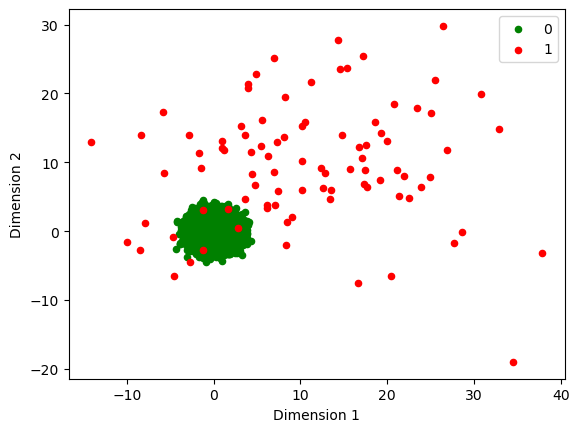

In [12]:
#visualise the outcome
data.rename(columns = {0: 'Index', 1: 'Dimension 1', 2: 'Dimension 2'}, inplace = True)

labels = pd.DataFrame(labels, columns = ['Label'])

df = pd.concat([data, labels], axis = 1)

fig, ax = plt.subplots()
colours_map = {0: 'green', 1: 'red'}
grouped = df.groupby('Label')
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x='Dimension 1', y='Dimension 2', label=key, color=colours_map[key])

plt.legend()
plt.show()

In [13]:
#create datasets of dim 2, 10, 20
for dim in [2, 10, 20]:

    #create the dataset
    inliers = np.random.normal(mu, sigma, (num_inliers, dim))
    outliers = np.random.normal(mu2, sigma2, (num_anomalies, dim))
    s = np.concatenate([inliers, outliers])
    labels = [0] * num_inliers + [1] * num_anomalies

    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = False)

    with open(os.path.join(OUTPUT_DIR, f'label_{dim}.pickle'), 'wb') as handle:
            pickle.dump(labels, handle)

In [14]:
#top n lof with c = 10, d = 2/10/20, k = 30, n = 90 (0.1% of 90000), r = 10

for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 10 -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_2\\dim_{dim}.csv -k 30 -n 90 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_2\\dim_{dim} -r 10", \
        stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')
    
    for line in iter(p.stdout.readline, ''): 
        if not line:
            break
        print(line.decode('utf-8'))

Set Arguments.......

K = 30

Top-N = 90

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\synthetic_2\dim_2.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\synthetic_2\dim_2

Dim =  2

Domain Range =  10.0

Cluster Radius Rate =  10.0

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 1

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 0 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 0

Number of Pruned Points: 0

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points............

...............Start Com

In [15]:
#sklearn lof

for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    lof = LocalOutlierFactor()
    
    start = datetime.now()
    lof.fit_predict(df)
    stop = datetime.now()
    
    time_diff = round((stop - start).total_seconds(), 1)
    print(f"Time taken for {dim} dimensions: {time_diff}")

Time taken for 2 dimensions: 0.4
Time taken for 10 dimensions: 38.3
Time taken for 20 dimensions: 107.2


# 3. Increasing the dataset size to 500,000 with no anomalies

In [2]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_3'

In [3]:
#set the mean and standard deviation of the gaussian distribution
mu, sigma = 0, 1
#number of rows
size = 500000

In [18]:
#dimensions to test are 2, 10, 20
for dim in [2, 10, 20]:
    s = np.random.normal(mu, sigma, (size, dim))
    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = False)

In [19]:
#top n lof with c = 2, d = 2/10/20, k = 2, n = 10, r = 2
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 2 -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_3\\dim_{dim}.csv -k 2 -n 10 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_3\\dim_{dim} -r 2", \
        stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')
    
    for line in iter(p.stdout.readline, ''): 
        if not line:
            break
        print(line.decode('utf-8'))

Set Arguments.......

K = 2

Top-N = 10

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\synthetic_3\dim_2.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\synthetic_3\dim_2

Dim =  2

Domain Range =  2.0

Cluster Radius Rate =  2.0

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 5

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 1 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 0

Number of Pruned Points: 0

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points............

...............Start Comput

In [4]:
#sklearn lof

for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    lof = LocalOutlierFactor()
    
    start = datetime.now()
    lof.fit_predict(df)
    stop = datetime.now()
    
    time_diff = round((stop - start).total_seconds(), 1)
    print(f"Time taken for {dim} dimensions: {time_diff}")

Time taken for 2 dimensions: 2.8
Time taken for 10 dimensions: 898.7
Time taken for 20 dimensions: 3071.7


# 4. Comparing F1 score for outlier class

In [2]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_4'
RESULT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_4'

In [3]:
#set the mean and standard deviation of the gaussian distribution for inliers
mu, sigma = 0, 1
#set the mean and standard deviation of the gaussian distribution for outliers
mu2, sigma2 = 10, 10
#number of rows
size = 90000
num_anomalies = int(0.001 * size)
num_inliers = size - num_anomalies

In [4]:
#create datasets of dim 2, 10, 20
for dim in [2, 10, 20]:

    #create the dataset
    inliers = np.random.normal(mu, sigma, (num_inliers, dim))
    outliers = np.random.normal(mu2, sigma2, (num_anomalies, dim))
    s = np.concatenate([inliers, outliers])
    labels = [0] * num_inliers + [1] * num_anomalies

    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = False)

    with open(os.path.join(OUTPUT_DIR, f'label_{dim}.pickle'), 'wb') as handle:
            pickle.dump(labels, handle)

In [5]:
#top n lof with c = 10, d = 2/10/20, k = 30, n = 90 (0.1% of 90000), r = 10

for dim in [2, 10, 20]:
    #read data
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values

    with open(os.path.join(OUTPUT_DIR, f'label_{dim}.pickle'), 'rb') as handle:
            labels = pickle.load(handle)
    
    #get result
    subprocess.call(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 10 -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_4\\dim_{dim}.csv -k 30 -n 90 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_4\\dim_{dim} -r 10", \
        stderr = subprocess.DEVNULL, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')
    
    with open(os.path.join(RESULT_DIR, f'dim_{dim}')) as f:
        preds = f.readlines()

    short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
    preds = np.zeros(df.shape[0])
    preds[short_preds] = 1

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(f"0")
        continue
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

    print(f"F1 Score for {dim} dimensions: {f1}")

F1 Score for 2 dimensions: 42.2
F1 Score for 10 dimensions: 46.7
F1 Score for 20 dimensions: 47.8


In [6]:
#sklearn lof

for dim in [2, 10, 20]:
    #read data
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values

    with open(os.path.join(OUTPUT_DIR, f'label_{dim}.pickle'), 'rb') as handle:
            labels = pickle.load(handle)
    
    lof = LocalOutlierFactor(contamination = 0.001)
    preds = lof.fit_predict(df)

    preds = list(map(lambda x: 0 if x == 1 else 1, preds))

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(f"0")
        continue
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

    print(f"F1 Score for {dim} dimensions: {f1}")

F1 Score for 2 dimensions: 33.3
F1 Score for 10 dimensions: 35.6
F1 Score for 20 dimensions: 38.9


# 5. How does the parameter n affect Top N LOF's performance?

In [7]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_5'
RESULT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_5'

In [8]:
#set the mean and standard deviation of the gaussian distribution for inliers
mu, sigma = 0, 1
#set the mean and standard deviation of the gaussian distribution for outliers
mu2, sigma2 = 10, 10
#set percentage of anomalies
percent = 0.01
#set dimension to 2
dim = 2

In [9]:
#create datasets of varying sizes
for n in [9, 90, 900]:

    size = int(n / percent)
    num_anomalies = n
    num_inliers = size - num_anomalies

    #create the dataset
    inliers = np.random.normal(mu, sigma, (num_inliers, dim))
    outliers = np.random.normal(mu2, sigma2, (num_anomalies, dim))
    s = np.concatenate([inliers, outliers])
    labels = [0] * num_inliers + [1] * num_anomalies

    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'n_{n}.csv'), header = False)

    with open(os.path.join(OUTPUT_DIR, f'label_{n}.pickle'), 'wb') as handle:
            pickle.dump(labels, handle)

In [10]:
#top n lof with c = 10, d = 2, k = 30, n = 9/90/900, r = 10

for n in [9, 90, 900]:
    #read data
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'n_{n}.csv'), header = None)
    df = df.iloc[:, 1:].values

    with open(os.path.join(OUTPUT_DIR, f'label_{n}.pickle'), 'rb') as handle:
            labels = pickle.load(handle)
    
    #get result
    subprocess.call(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 10 -d 2 \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_5\\n_{n}.csv -k 30 -n {n} \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_5\\n_{n} -r 10", \
        stderr = subprocess.DEVNULL, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')
    
    with open(os.path.join(RESULT_DIR, f'n_{n}')) as f:
        preds = f.readlines()

    short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
    preds = np.zeros(df.shape[0])
    preds[short_preds] = 1

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(f"0")
        continue
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

    print(f"F1 Score for {n} outliers: {f1}")

F1 Score for 9 outliers: 88.9
F1 Score for 90 outliers: 47.8
F1 Score for 900 outliers: 28.3


In [11]:
#sklearn lof

for n in [9, 90, 900]:
    #read data
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'n_{n}.csv'), header = None)
    df = df.iloc[:, 1:].values

    with open(os.path.join(OUTPUT_DIR, f'label_{n}.pickle'), 'rb') as handle:
            labels = pickle.load(handle)
    
    lof = LocalOutlierFactor(contamination = percent)
    preds = lof.fit_predict(df)

    preds = list(map(lambda x: 0 if x == 1 else 1, preds))

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(f"0")
        continue
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

    print(f"F1 Score for {n} outliers: {f1}")

F1 Score for 9 outliers: 88.9
F1 Score for 90 outliers: 40.0
F1 Score for 900 outliers: 24.8


# 6. Quick fix to be able to prune clusters

In [12]:
#edited the pruning condition in ComputeLofBound.java
#to compile
subprocess.call("javac -cp lib -sourcepath src -d lib src/microcluster/topnlof/TopNLOFDetection.java", \
                cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

0

In [13]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_6'

In [14]:
#set the mean and standard deviation of the gaussian distribution
mu, sigma = 0, 1
#number of rows
size = 90000

In [15]:
#dimensions to test are 2, 10, 20
for dim in [2, 10, 20]:
    s = np.random.normal(mu, sigma, (size, dim))
    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = False)

In [16]:
#run top n lof with c = 1, d = 2/10/20, k = 2, n = 10, r = 1
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 1 -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_6\\dim_{dim}.csv -k 2 -n 10 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_6\\dim_{dim} -r 1", \
        stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

    for line in iter(p.stdout.readline, ''): 
        if not line:
            break
        print(line.decode('utf-8'))

Set Arguments.......

K = 2

Top-N = 10

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\synthetic_6\dim_2.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\synthetic_6\dim_2

Dim =  2

Domain Range =  1.0

Cluster Radius Rate =  1.0

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 59

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 0 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 15

Number of Pruned Points: 9194

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points............

...............Start C

In [17]:
#sklearn lof
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    lof = LocalOutlierFactor()

    start = datetime.now()
    lof.fit_predict(df)
    stop = datetime.now()
    
    time_diff = round((stop - start).total_seconds(), 1)
    print(f"Time taken for {dim} dimensions: {time_diff}")

Time taken for 2 dimensions: 0.4
Time taken for 10 dimensions: 38.9
Time taken for 20 dimensions: 104.7


# 7.Calculating R and tuning C

In [ ]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_7'

In [ ]:
#set the mean and standard deviation of the gaussian distribution
mu, sigma = 0, 1
#number of rows
size = 90000

In [ ]:
#dimensions to test are 2, 10, 20
for dim in [2, 10, 20]:
    s = np.random.normal(mu, sigma, (size, dim))
    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = False)

In [ ]:
#keep a dictionary to record the values of r for each dimension
#r is defined to be the distance between the centre of the data and the furthest data point
r_dct = {}
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:]
    pts = df.values

    centre = df.mean().values
    centre = np.tile(centre, (pts.shape[0], 1))
    diffs = pts - centre
    diffs = np.square(diffs)
    diffs = np.sum(diffs, axis = 1)
    diffs = np.sqrt(diffs)

    idx = np.argmax(diffs)
    pt = diffs[idx]

    dist = pt - centre
    dist = np.square(dist)
    dist = np.sum(dist, axis = 1)
    dist = round(np.sqrt(dist)[0], 1)

    r_dct[dim] = dist
    print(f"Param r for {dim} dimensions: {dist}")

Param r for 2 dimensions: 6.9
Param r for 10 dimensions: 20.4
Param r for 20 dimensions: 35.4


In [ ]:
#run top n lof with d = 2/10/20, k = 20, n = 10
#c will be tuned, r will be based on the calculated values above
times_dct = {}
for dim in [2, 10, 20]:
    start = datetime.now()
    
    p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.1 -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_7\\dim_{dim}.csv -k 20 -n 10 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_7\\dim_{dim} -r {r_dct[dim]}", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master', stdout=subprocess.PIPE)

    for line in iter(p.stdout.readline, ''): 
        if not line:
            break
        print(line.decode('utf-8'))
    
    stop = datetime.now()
    
    time_diff = round((stop - start).total_seconds(), 1)
    times_dct[dim] = time_diff

Time taken for 2 dimensions: 5.8
Time taken for 10 dimensions: 514.1
Time taken for 20 dimensions: 1042.6


In [ ]:
#sklearn lof
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values

    lof = LocalOutlierFactor()
    
    start = datetime.now()
    lof.fit_predict(df)
    stop = datetime.now()
    
    time_diff = round((stop - start).total_seconds(), 1)
    print(f"Time taken for {dim} dimensions: {time_diff}")

Time taken for 2 dimensions: 0.4
Time taken for 10 dimensions: 39.0
Time taken for 20 dimensions: 101.7


# 8. Comparing f1 score for outlier class

In [ ]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_8'
RESULT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_8'

## Global Outliers

In [ ]:
# global outliers
mu, sigma  = 0, 1
mu_noise, sigma_noise = 5, 5
mu2, sigma2 = 10, 1
size = 90000
num_anomalies = 10
num_inliers = size - num_anomalies

for dim in [2, 10, 20]:
    dist1_size = np.random.randint(num_inliers, size = 1)[0]
    dist2_size = num_inliers - dist1_size

    d1_inliers = np.random.normal(mu, sigma, (dist1_size, dim))
    d2_inliers = np.random.normal(mu2, sigma2, (dist2_size, dim))
    outliers = np.random.normal(mu_noise, sigma_noise, (num_anomalies, dim))
    s = np.concatenate([d1_inliers, d2_inliers, outliers])
    labels = [0] * num_inliers + [1] * num_anomalies

    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'global_dim_{dim}.csv'), header = False)

    with open(os.path.join(OUTPUT_DIR, f'global_labels_{dim}.pickle'), 'wb') as handle:
        pickle.dump(labels, handle)

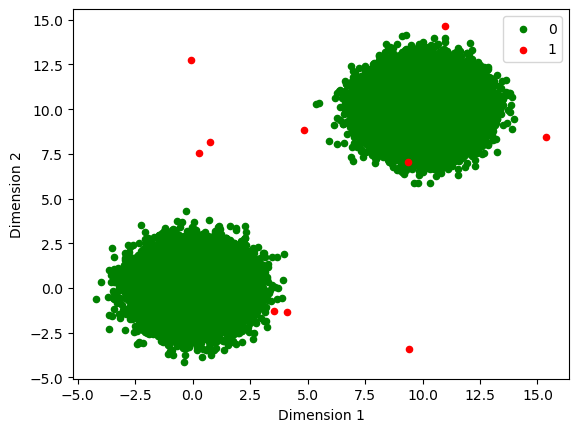

In [ ]:
#visualise global outliers
data = pd.read_csv(os.path.join(OUTPUT_DIR, f'global_dim_{dim}.csv'), header = None)
data.rename(columns = {0: 'Index', 1: 'Dimension 1', 2: 'Dimension 2'}, inplace = True)

with open(os.path.join(OUTPUT_DIR, f'global_labels_{dim}.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

labels = pd.DataFrame(labels, columns = ['Label'])

df = pd.concat([data, labels], axis = 1)

fig, ax = plt.subplots()
colours_map = {0: 'green', 1: 'red'}
grouped = df.groupby('Label')
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x='Dimension 1', y='Dimension 2', label=key, color=colours_map[key])

plt.legend()
plt.show()

In [ ]:
#keep a dictionary to record the values of r for each dimension
r_dct = {}
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'global_dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:]
    pts = df.values

    centre = df.mean().values
    centre = np.tile(centre, (pts.shape[0], 1))
    diffs = pts - centre
    diffs = np.square(diffs)
    diffs = np.sum(diffs, axis = 1)
    diffs = np.sqrt(diffs)

    idx = np.argmax(diffs)
    pt = diffs[idx]

    dist = pt - centre
    dist = np.square(dist)
    dist = np.sum(dist, axis = 1)
    dist = round(np.sqrt(dist)[0], 1)

    r_dct[dim] = dist
    print(f"Param r for {dim} dimensions: {dist}")

Param r for 2 dimensions: 9.3
Param r for 10 dimensions: 68.3
Param r for 20 dimensions: 119.2


In [ ]:
#global outliers: top n lof with c = 0.1 (to be tuned further if needed), d = 2/10/20, k = 20, n = 10, r (calculated above)
results = {}
c_dct = {2: 0.1, 10: 0.05, 20: 0.05}
for dim in [2, 10, 20]:
    #read data
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'global_dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values

    with open(os.path.join(OUTPUT_DIR, f'global_labels_{dim}.pickle'), 'rb') as handle:
            labels = pickle.load(handle)
    
    p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c {c_dct[dim]} -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_8\\global_dim_{dim}.csv -k 20 -n 10 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_8\\global_dim_{dim} -r {r_dct[dim]}", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master', stdout=subprocess.PIPE)

    for line in iter(p.stdout.readline, ''): 
        if not line:
            break
        print(line.decode('utf-8'))
    
    with open(os.path.join(RESULT_DIR, f'global_dim_{dim}')) as f:
        preds = f.readlines()

    short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
    preds = np.zeros(df.shape[0])
    preds[short_preds] = 1

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(f"0")
        continue
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

    results[dim] = f1

Set Arguments.......

K = 20

Top-N = 10

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\synthetic_8\global_dim_2.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\synthetic_8\global_dim_2

Dim =  2

Domain Range =  9.300000190734863

Cluster Radius Rate =  0.1

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 119

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 1 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 62

Number of Pruned Points: 51826

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points.....

In [ ]:
for dim in [2, 10, 20]:
    print(f"F1 Score for {dim} dimensions: {results[dim]}")

F1 Score for 2 dimensions: 70.0
F1 Score for 10 dimensions: 70.0
F1 Score for 20 dimensions: 90.0


In [ ]:
#sklearn lof
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'global_dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    lof = LocalOutlierFactor(contamination = 10 / 90000)
    preds = lof.fit_predict(df)

    preds = list(map(lambda x: 0 if x == 1 else 1, preds))

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(f"0")
        continue
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

    print(f"F1 Score for {dim} dimensions: {f1}")

F1 Score for 2 dimensions: 70.0
F1 Score for 10 dimensions: 100.0
F1 Score for 20 dimensions: 100.0


## Local Outliers

In [ ]:
#local outliers
mu, sigma = 10, 1
mu2, sigma2 = 60, 1
mu_noise, sigma_noise = 5, 1
size = 90000
num_anomalies = 10
num_inliers = size - num_anomalies

for dim in [2, 10, 20]:
    dist1_size = np.random.randint(num_inliers, size = 1)[0]
    dist2_size = num_inliers - dist1_size
    dist1_anomalies = np.random.randint(num_anomalies, size = 1)[0]
    dist2_anomalies = num_anomalies - dist1_anomalies
    
    d1_inliers = np.random.normal(mu, sigma, (dist1_size, dim))
    d1_anomalies = np.random.normal(mu, sigma, (dist1_anomalies, dim))
    d1_anomalies_noise = np.random.normal(mu_noise, sigma_noise, (dist1_anomalies, dim))
    for i in range(len(d1_anomalies)):
        chance = np.random.rand(1)[0]
        if chance < 0.5: #probability to decide to put the anomaly to the left or right of the inliers
            d1_anomalies[i] = d1_anomalies[i] + d1_anomalies_noise[i]
        else:
            d1_anomalies[i] = d1_anomalies[i] - d1_anomalies_noise[i]

    d2_inliers = np.random.normal(mu2, sigma2, (dist2_size, dim))
    d2_anomalies = np.random.normal(mu2, sigma2, (dist2_anomalies, dim))
    d2_anomalies_noise = np.random.normal(mu_noise, sigma_noise, (dist2_anomalies, dim))
    for i in range(len(d2_anomalies)):
        chance = np.random.rand(1)[0]
        if chance < 0.5:
            d2_anomalies[i] = d2_anomalies[i] + d2_anomalies_noise[i]
        else:
            d2_anomalies[i] = d2_anomalies[i] - d2_anomalies_noise[i]

    s = np.concatenate([d1_inliers, d2_inliers, d1_anomalies, d2_anomalies])
    labels = [0] * num_inliers + [1] * num_anomalies
    df = pd.DataFrame(s)
    df.to_csv(os.path.join(OUTPUT_DIR, f'local_dim_{dim}.csv'), header = False)

    with open(os.path.join(OUTPUT_DIR, f'local_labels_{dim}.pickle'), 'wb') as handle:
        pickle.dump(labels, handle)

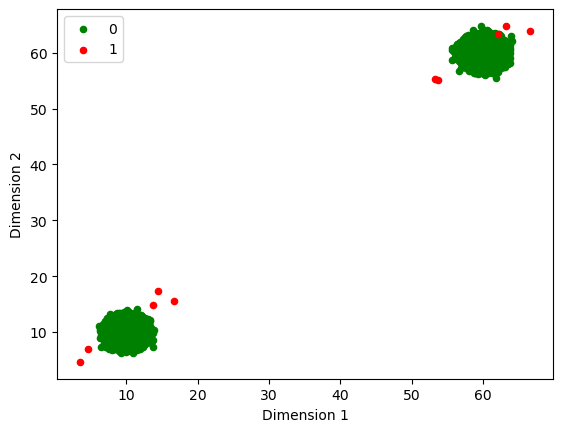

In [ ]:
#visualise local outliers
data = pd.read_csv(os.path.join(OUTPUT_DIR, f'local_dim_{dim}.csv'), header = None)
data.rename(columns = {0: 'Index', 1: 'Dimension 1', 2: 'Dimension 2'}, inplace = True)

with open(os.path.join(OUTPUT_DIR, f'local_labels_{dim}.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

labels = pd.DataFrame(labels, columns = ['Label'])

df = pd.concat([data, labels], axis = 1)

fig, ax = plt.subplots()
colours_map = {0: 'green', 1: 'red'}
grouped = df.groupby('Label')
for key, group in grouped:
    group.plot(ax = ax, kind='scatter', x='Dimension 1', y='Dimension 2', label=key, color=colours_map[key])

plt.legend()
plt.show()

In [ ]:
#keep a dictionary to record the values of r for each dimension
r_dct = {}
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'local_dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:]
    pts = df.values

    centre = df.mean().values
    centre = np.tile(centre, (pts.shape[0], 1))
    diffs = pts - centre
    diffs = np.square(diffs)
    diffs = np.sum(diffs, axis = 1)
    diffs = np.sqrt(diffs)

    idx = np.argmax(diffs)
    pt = diffs[idx]

    dist = pt - centre
    dist = np.square(dist)
    dist = np.sum(dist, axis = 1)
    dist = round(np.sqrt(dist)[0], 1)

    r_dct[dim] = dist
    print(f"Param r for {dim} dimensions: {dist}")

Param r for 2 dimensions: 60.7
Param r for 10 dimensions: 373.5
Param r for 20 dimensions: 628.1


In [ ]:
#local outliers: top n lof with c = 0.1 (to be tuned further if needed), d = 2/10/20, k = 20, n = 10, r (calculated above)
results = {}
c_dct = {2: 0.025, 10: 0.0125, 20: 0.009375}
for dim in [2, 10, 20]:
    #read data
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'local_dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values

    with open(os.path.join(OUTPUT_DIR, f'local_labels_{dim}.pickle'), 'rb') as handle:
            labels = pickle.load(handle)
    
    p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c {c_dct[dim]} -d {dim} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_8\\local_dim_{dim}.csv -k 20 -n 10 \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_8\\local_dim_{dim} -r {r_dct[dim]}", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master', stdout=subprocess.PIPE)

    for line in iter(p.stdout.readline, ''): 
        if not line:
            break
        print(line.decode('utf-8'))
    
    with open(os.path.join(RESULT_DIR, f'local_dim_{dim}')) as f:
        preds = f.readlines()

    short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
    preds = np.zeros(df.shape[0])
    preds[short_preds] = 1

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(f"0")
        continue
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

    results[dim] = f1

Set Arguments.......

K = 20

Top-N = 10

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\synthetic_8\local_dim_2.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\synthetic_8\local_dim_2

Dim =  2

Domain Range =  60.70000076293945

Cluster Radius Rate =  0.025

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 69

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 0 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 22

Number of Pruned Points: 24146

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points......

In [ ]:
for dim in [2, 10, 20]:
    print(f"F1 Score for {dim} dimensions: {results[dim]}")

F1 Score for 2 dimensions: 90.0
F1 Score for 10 dimensions: 90.0
F1 Score for 20 dimensions: 80.0


In [ ]:
#sklearn lof
for dim in [2, 10, 20]:
    df = pd.read_csv(os.path.join(OUTPUT_DIR, f'local_dim_{dim}.csv'), header = None)
    df = df.iloc[:, 1:].values
    
    lof = LocalOutlierFactor(contamination = 10 / 90000)
    preds = lof.fit_predict(df)

    preds = list(map(lambda x: 0 if x == 1 else 1, preds))

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(f"0")
        continue
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

    print(f"F1 Score for {dim} dimensions: {f1}")

F1 Score for 2 dimensions: 90.0
F1 Score for 10 dimensions: 100.0
F1 Score for 20 dimensions: 100.0


# 9. ML Matt

In [ ]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_9'
RESULT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_9'

## 9.1 Vanilla Attempt

In [ ]:
#preprocessing

df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ML-MATT-CompetitionQT1920_train.csv'), encoding = 'latin-1')

#remove rows where maxUE_UL+DL value is gibberish
df = df[(df['maxUE_UL+DL'] != '#¡VALOR!') & ~(pd.isnull(df['maxUE_UL+DL']))]

#convert maxUE_UL+DL column to integer
df['maxUE_UL+DL'] = df['maxUE_UL+DL'].astype(int)

#drop time column
df = df.iloc[:, 1:]

percent_anomaly = df[df['Unusual'] == 1].shape[0] / df.shape[0]

print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of anomalies: {round(percent_anomaly * 100, 1)}")

#get target column
labels = df['Unusual'].values
df = df.iloc[:, :-1]

#one hot encode cell name column
enc = OneHotEncoder(sparse = False)
train_ohe = enc.fit_transform(df[['CellName']])
cats = list(enc.categories_[0])

#normalize the remaining numerical columns
df = df.iloc[:, 1:]
mins = df.min()
maxs = df.max()
df = (df - mins) / (maxs - mins)

#concat ohe 
ohe_df = pd.DataFrame(train_ohe, columns = cats)
df = pd.concat([df.reset_index(drop = True), ohe_df.reset_index(drop = True)], axis = 1)

print(f"Number of columns: {df.shape[1]}")

#save files
df.to_csv(os.path.join(OUTPUT_DIR, 'ml_matt_full.csv'), header = False)

with open(os.path.join(OUTPUT_DIR, 'ml_matt_full_labels.pickle'), 'wb') as handle:
    pickle.dump(labels, handle)

Number of rows: 36815
Percentage of anomalies: 27.6
Number of columns: 44


In [ ]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ml_matt_full.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'ml_matt_full_labels.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 11.5
Param n: 10167
Param d: 44


In [ ]:
#top n lof
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ml_matt_full.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'ml_matt_full_labels.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.003125 -d {d} \
-i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_9\\ml_matt_full.csv -k 20 -n {n} \
-o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_9\\ml_matt_full -r {r}", \
    stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

for line in iter(p.stdout.readline, ''): 
    if not line:
        break
    print(line.decode('utf-8'))

with open(os.path.join(RESULT_DIR, 'ml_matt_full')) as f:
    preds = f.readlines()

short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
preds = np.zeros(df.shape[0])
preds[short_preds] = 1

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score: {f1}")

Set Arguments.......

K = 20

Top-N = 10167

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\real_world_9\ml_matt_full.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\real_world_9\ml_matt_full

Dim =  44

Domain Range =  11.5

Cluster Radius Rate =  0.003125

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 15776

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 23 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 1022

Number of Pruned Points: 7696

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points...

In [ ]:
#sklearn
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ml_matt_full.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'ml_matt_full_labels.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
lof = LocalOutlierFactor(contamination = percent_anomaly)
start = datetime.now()
preds = lof.fit_predict(df)
stop = datetime.now()
preds = list(map(lambda x: 0 if x == 1 else 1, preds))

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score: {f1}")

time_diff = round((stop - start).total_seconds(), 1)
print(f"Time taken: {time_diff} seconds")

F1 Score: 28.1
Time taken: 18.3 seconds


## 9.2 Tuning k

In [ ]:
#preprocessing

df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ML-MATT-CompetitionQT1920_train.csv'), encoding = 'latin-1')

#remove rows where maxUE_UL+DL value is gibberish
df = df[(df['maxUE_UL+DL'] != '#¡VALOR!') & ~(pd.isnull(df['maxUE_UL+DL']))]

#convert maxUE_UL+DL column to integer
df['maxUE_UL+DL'] = df['maxUE_UL+DL'].astype(int)

#drop time column
df = df.iloc[:, 1:]

# train test split
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 2022, stratify = df['Unusual'])

#get target column
train_labels = train_df['Unusual'].values
train_df = train_df.iloc[:, :-1]

test_labels = test_df['Unusual'].values
test_df = test_df.iloc[:, :-1]

#one hot encode cell name column
enc = OneHotEncoder(sparse = False)
train_ohe = enc.fit_transform(train_df[['CellName']])
cats = list(enc.categories_[0])
test_ohe = enc.transform(test_df[['CellName']])

#normalize the remaining numerical columns
train_df = train_df.iloc[:, 1:]
test_df = test_df.iloc[:, 1:]
mins = train_df.min()
maxs = train_df.max()
train_df = (train_df - mins) / (maxs - mins)
test_df = (test_df - mins) / (maxs - mins)

#concat ohe 
ohe_df = pd.DataFrame(train_ohe, columns = cats)
train_df = pd.concat([train_df.reset_index(drop = True), ohe_df.reset_index(drop = True)], axis = 1)

ohe_df = pd.DataFrame(test_ohe, columns = cats)
test_df = pd.concat([test_df.reset_index(drop = True), ohe_df.reset_index(drop = True)], axis = 1)

#save files
train_df.to_csv(os.path.join(OUTPUT_DIR, 'ml_matt_train.csv'), header = False)
test_df.to_csv(os.path.join(OUTPUT_DIR, 'ml_matt_test.csv'), header = False)

with open(os.path.join(OUTPUT_DIR, 'ml_matt_train_labels.pickle'), 'wb') as handle:
    pickle.dump(train_labels, handle)

with open(os.path.join(OUTPUT_DIR, 'ml_matt_test_labels.pickle'), 'wb') as handle:
    pickle.dump(test_labels, handle)

### Tuning k for Top N LOF

In [ ]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ml_matt_train.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'ml_matt_train_labels.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 11.6
Param n: 7117
Param d: 44


F1 Score for 10 neighbours: 27.8
F1 Score for 20 neighbours: 28.4
F1 Score for 30 neighbours: 28.3
F1 Score for 40 neighbours: 27.7
F1 Score for 50 neighbours: 27.4
F1 Score for 60 neighbours: 27.2
F1 Score for 70 neighbours: 27.0
F1 Score for 80 neighbours: 26.7
F1 Score for 90 neighbours: 26.1
F1 Score for 100 neighbours: 25.0
F1 Score for 110 neighbours: 24.1
F1 Score for 120 neighbours: 23.4
F1 Score for 130 neighbours: 22.9
F1 Score for 140 neighbours: 22.2
F1 Score for 150 neighbours: 21.4
F1 Score for 160 neighbours: 21.1
F1 Score for 170 neighbours: 20.8
F1 Score for 180 neighbours: 20.5
F1 Score for 190 neighbours: 20.3
F1 Score for 200 neighbours: 19.6
F1 Score for 210 neighbours: 19.2
F1 Score for 220 neighbours: 19.0
F1 Score for 230 neighbours: 18.7
F1 Score for 240 neighbours: 18.5
F1 Score for 250 neighbours: 18.3
F1 Score for 260 neighbours: 18.4
F1 Score for 270 neighbours: 18.1
F1 Score for 280 neighbours: 18.0
F1 Score for 290 neighbours: 17.9
F1 Score for 300 neighb

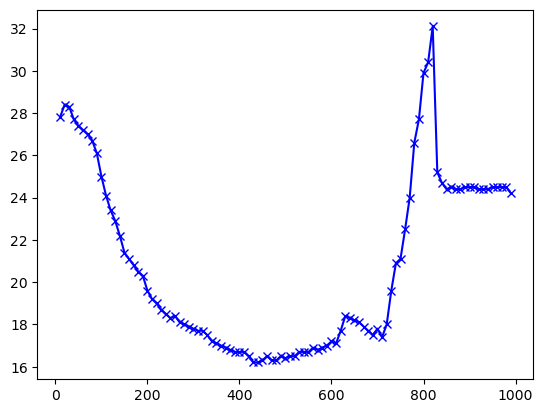

In [ ]:
#tune k on top n lof

best_k = 0
best_score = 0
full_scores = []
for k in range(10, 1000, 10):
        #get result
        subprocess.call(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.003125 -d {d} \
        -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_9\\ml_matt_train.csv -k {k} \
                -n {n} \
        -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_9\\ml_matt_train -r {r}", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

        with open(os.path.join(RESULT_DIR, 'ml_matt_train')) as f:
                preds = f.readlines()

        short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
        preds = np.zeros(df.shape[0])
        preds[short_preds] = 1

        preds = np.array(preds)
        labels = np.array(labels)

        #calculate f1 score for anomaly class
        diff = preds - labels
        #calculate tp
        tp = len(np.where(((diff == 0) & (labels == 1)))[0])
        #calculate fn
        fn = len(np.where(((diff == -1) & (labels == 1)))[0])
        #calculate fp
        fp = len(np.where(((diff == 1) & (labels == 0)))[0])
        if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
                full_scores.append(0)
                continue
        #calculate precision
        prc = tp / (tp + fp)
        #calculate recall
        rec = tp / (tp + fn)
        #calculate f1 score
        f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

        if f1 > best_score:
                best_score = f1
                best_k = k

        full_scores.append(f1)
        print(f"F1 Score for {k} neighbours: {f1}")

plt.plot(range(10, 1000, 10), full_scores, 'bx-')
plt.show()

In [ ]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ml_matt_test.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'ml_matt_test_labels.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 11.6
Param n: 3050
Param d: 44


In [ ]:
#top n lof with best k
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ml_matt_test.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'ml_matt_test_labels.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.003125 -d {d} \
-i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_9\\ml_matt_test.csv -k {best_k} \
    -n {n} \
-o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_9\\ml_matt_test -r {r}", \
    stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

for line in iter(p.stdout.readline, ''): 
    if not line:
        break
    print(line.decode('utf-8'))

with open(os.path.join(RESULT_DIR, 'ml_matt_test')) as f:
    preds = f.readlines()

short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
preds = np.zeros(df.shape[0])
preds[short_preds] = 1

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score for {best_k} neighbours: {f1}")

Set Arguments.......

K = 820

Top-N = 3050

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\real_world_9\ml_matt_test.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\real_world_9\ml_matt_test

Dim =  44

Domain Range =  11.600000381469727

Cluster Radius Rate =  0.003125

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 6200

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 3 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 948

Number of Pruned Points: 2977

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unprune

### Tuning k for Sklearn

F1 Score for 10 neighbours: 27.7
F1 Score for 20 neighbours: 28.3
F1 Score for 30 neighbours: 28.2
F1 Score for 40 neighbours: 28.0
F1 Score for 50 neighbours: 27.6
F1 Score for 60 neighbours: 27.2
F1 Score for 70 neighbours: 27.3
F1 Score for 80 neighbours: 27.2
F1 Score for 90 neighbours: 26.1
F1 Score for 100 neighbours: 25.2
F1 Score for 110 neighbours: 24.2
F1 Score for 120 neighbours: 23.7
F1 Score for 130 neighbours: 22.9
F1 Score for 140 neighbours: 22.4
F1 Score for 150 neighbours: 21.9
F1 Score for 160 neighbours: 21.3
F1 Score for 170 neighbours: 21.0
F1 Score for 180 neighbours: 20.7
F1 Score for 190 neighbours: 20.4
F1 Score for 200 neighbours: 20.0
F1 Score for 210 neighbours: 19.6
F1 Score for 220 neighbours: 19.2
F1 Score for 230 neighbours: 18.8
F1 Score for 240 neighbours: 18.4
F1 Score for 250 neighbours: 18.0
F1 Score for 260 neighbours: 18.0
F1 Score for 270 neighbours: 18.1
F1 Score for 280 neighbours: 17.8
F1 Score for 290 neighbours: 17.4
F1 Score for 300 neighb

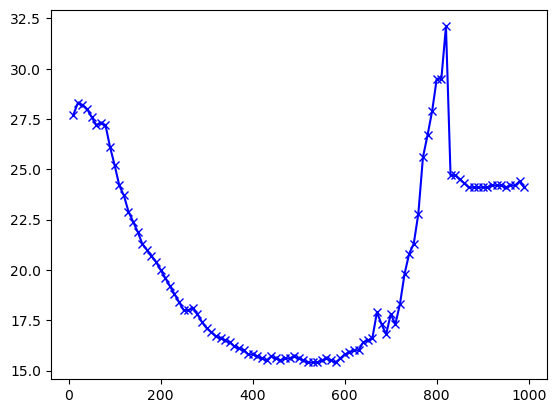

In [ ]:
#tuning k for sklearn
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ml_matt_train.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'ml_matt_train_labels.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

percent_anomaly = sum(labels) / len(labels)

best_k = 0
best_score = 0
full_scores = []
for k in range(10, 1000, 10):
        #get result
        lof = LocalOutlierFactor(contamination = percent_anomaly, n_neighbors=k)
        preds = lof.fit_predict(df)
        preds = list(map(lambda x: 0 if x == 1 else 1, preds))

        preds = np.array(preds)
        labels = np.array(labels)

        #calculate f1 score for anomaly class
        diff = preds - labels
        #calculate tp
        tp = len(np.where(((diff == 0) & (labels == 1)))[0])
        #calculate fn
        fn = len(np.where(((diff == -1) & (labels == 1)))[0])
        #calculate fp
        fp = len(np.where(((diff == 1) & (labels == 0)))[0])
        if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
                full_scores.append(0)
                continue
        #calculate precision
        prc = tp / (tp + fp)
        #calculate recall
        rec = tp / (tp + fn)
        #calculate f1 score
        f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

        if f1 > best_score:
                best_score = f1
                best_k = k

        full_scores.append(f1)
        print(f"F1 Score for {k} neighbours: {f1}")

plt.plot(range(10, 1000, 10), full_scores, 'bx-')
plt.show()

In [ ]:
#sklearn with best k
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'ml_matt_test.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'ml_matt_test_labels.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

percent_anomaly = sum(labels) / len(labels)

#get result
lof = LocalOutlierFactor(contamination = percent_anomaly, n_neighbors = best_k)
start = datetime.now()
preds = lof.fit_predict(df)
stop = datetime.now()
preds = list(map(lambda x: 0 if x == 1 else 1, preds))

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score for {best_k} neighbours: {f1}")

time_diff = round((stop - start).total_seconds(), 1)
print(f"Time taken: {time_diff} seconds")

F1 Score for 820 neighbours: 20.6
Time taken: 3.0 seconds


# 10. Access Behaviour Anomaly Dataset

In [ ]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_10'
RESULT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_10'

## 10.1 Vanilla Attempt

In [ ]:
#preprocessing
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'supervised_dataset.csv'))

#remove rows where inter_api_access_duration(sec) column and api_access_uniqueness column got empty values
df = df[~(pd.isnull(df['inter_api_access_duration(sec)'])) & ~(pd.isnull(df['api_access_uniqueness']))]

#drop the first two columns
df = df.iloc[:, 2:]

percent_anomaly = df[df['classification'] == 'outlier'].shape[0] / df.shape[0]

print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of anomalies: {round(percent_anomaly * 100, 1)}")

#get target column
labels = df['classification'].values
labels = list(map(lambda x: 1 if x == 'outlier' else 0, labels))
df = df.iloc[:, :-1]

#ip type only got 2 values, just put 1 or 0
df['ip_type'] = df['ip_type'].map(lambda x: 1 if x == 'default' else 0)

#source only got 2 values, just put 1 or 0
df['source'] = df['source'].map(lambda x: 1 if x == 'E' else 0)

#normalize the remaining numerical columns
cols = list(df.columns.tolist())
cols = list(filter(lambda x: ((x != 'ip_type') and (x != 'source')), cols))
mins = df[cols].min()
maxs = df[cols].max()

df[cols] = (df[cols] - mins) / (maxs - mins)

print(f"Number of columns: {df.shape[1]}")

df.reset_index(drop = True).to_csv(os.path.join(OUTPUT_DIR, 'access_full.csv'), header = False)

with open(os.path.join(OUTPUT_DIR, 'access_labels_full.pickle'), 'wb') as handle:
    pickle.dump(labels, handle)

Number of rows: 1695
Percentage of anomalies: 34.7
Number of columns: 9


In [ ]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'access_full.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'access_labels_full.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 4.4
Param n: 589
Param d: 9


In [ ]:
#top n lof
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'access_full.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'access_labels_full.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.003125 -d {d} \
-i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_10\\access_full.csv -k 20 -n {n} \
-o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_10\\access_full -r {r}", \
    stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

for line in iter(p.stdout.readline, ''): 
    if not line:
        
        break
    print(line.decode('utf-8'))

with open(os.path.join(RESULT_DIR, 'access_full')) as f:
    preds = f.readlines()

short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
preds = np.zeros(df.shape[0])
preds[short_preds] = 1

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score: {f1}")

Set Arguments.......

K = 20

Top-N = 589

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\real_world_10\access_full.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\real_world_10\access_full

Dim =  9

Domain Range =  4.400000095367432

Cluster Radius Rate =  0.003125

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 690

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 0 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 24

Number of Pruned Points: 123

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Point

In [ ]:
#sklearn
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'access_full.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'access_labels_full.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
lof = LocalOutlierFactor(contamination = percent_anomaly)
start = datetime.now()
preds = lof.fit_predict(df)
stop = datetime.now()
preds = list(map(lambda x: 0 if x == 1 else 1, preds))

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score: {f1}")

time_diff = round((stop - start).total_seconds(), 1)
print(f"Time taken: {time_diff} seconds")

F1 Score: 45.5
Time taken: 0.0 seconds


## 10.2 Tuning k

In [ ]:
#preprocessing
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'supervised_dataset.csv'))

#remove rows where inter_api_access_duration(sec) column and api_access_uniqueness column got empty values
df = df[~(pd.isnull(df['inter_api_access_duration(sec)'])) & ~(pd.isnull(df['api_access_uniqueness']))]

#drop the first two columns
df = df.iloc[:, 2:]

# train test split
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 2022, stratify = df['classification'])

#get target column
train_labels = train_df['classification'].values
train_labels = list(map(lambda x: 1 if x == 'outlier' else 0, train_labels))
train_df = train_df.iloc[:, :-1]

test_labels = test_df['classification'].values
test_labels = list(map(lambda x: 1 if x == 'outlier' else 0, test_labels))
test_df = test_df.iloc[:, :-1]

#ip type only got 2 values, just put 1 or 0
train_df['ip_type'] = train_df['ip_type'].map(lambda x: 1 if x == 'default' else 0)
test_df['ip_type'] = test_df['ip_type'].map(lambda x: 1 if x == 'default' else 0)

#source only got 2 values, just put 1 or 0
train_df['source'] = train_df['source'].map(lambda x: 1 if x == 'E' else 0)
test_df['source'] = test_df['source'].map(lambda x: 1 if x == 'E' else 0)

#normalize the remaining numerical columns
cols = list(train_df.columns.tolist())
cols = list(filter(lambda x: ((x != 'ip_type') and (x != 'source')), cols))
mins = train_df[cols].min()
maxs = train_df[cols].max()

train_df[cols] = (train_df[cols] - mins) / (maxs - mins)
test_df[cols] = (test_df[cols] - mins) / (maxs - mins)

train_df.reset_index(drop = True).to_csv(os.path.join(OUTPUT_DIR, 'access_train.csv'), header = False)
test_df.reset_index(drop = True).to_csv(os.path.join(OUTPUT_DIR, 'access_test.csv'), header = False)

with open(os.path.join(OUTPUT_DIR, 'access_labels_train.pickle'), 'wb') as handle:
    pickle.dump(train_labels, handle)
with open(os.path.join(OUTPUT_DIR, 'access_labels_test.pickle'), 'wb') as handle:
    pickle.dump(test_labels, handle)

### Tuning k for Top N LOF

In [ ]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'access_train.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'access_labels_train.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 4.3
Param n: 412
Param d: 9


F1 Score for 10 neighbours: 42.7
F1 Score for 20 neighbours: 43.0
F1 Score for 30 neighbours: 42.2
F1 Score for 40 neighbours: 35.4
F1 Score for 50 neighbours: 32.8
F1 Score for 60 neighbours: 30.8
F1 Score for 70 neighbours: 24.0
F1 Score for 80 neighbours: 21.8
F1 Score for 90 neighbours: 22.1
F1 Score for 100 neighbours: 37.4
F1 Score for 110 neighbours: 44.9
F1 Score for 120 neighbours: 48.3
F1 Score for 130 neighbours: 47.3
F1 Score for 140 neighbours: 44.4
F1 Score for 150 neighbours: 40.3
F1 Score for 160 neighbours: 40.5
F1 Score for 170 neighbours: 40.5
F1 Score for 180 neighbours: 41.0
F1 Score for 190 neighbours: 41.3
F1 Score for 200 neighbours: 40.3
F1 Score for 210 neighbours: 39.6
F1 Score for 220 neighbours: 39.1
F1 Score for 230 neighbours: 39.8
F1 Score for 240 neighbours: 42.5
F1 Score for 250 neighbours: 44.4
F1 Score for 260 neighbours: 46.4
F1 Score for 270 neighbours: 47.6
F1 Score for 280 neighbours: 47.3
F1 Score for 290 neighbours: 49.3
F1 Score for 300 neighb

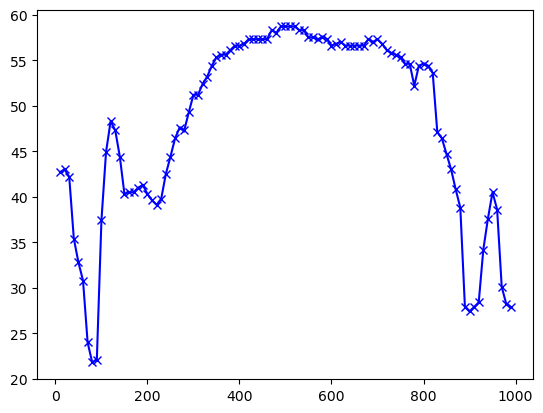

In [ ]:
#tune k on top n lof

best_k = 0
best_score = 0
full_scores = []
for k in range(10, 1000, 10):
        #get result
        subprocess.call(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.003125 -d {d} \
        -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_10\\access_train.csv -k {k} \
                -n {n} \
        -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_10\\access_train -r {r}", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

        with open(os.path.join(RESULT_DIR, 'access_train')) as f:
                preds = f.readlines()

        short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
        preds = np.zeros(df.shape[0])
        preds[short_preds] = 1

        preds = np.array(preds)
        labels = np.array(labels)

        #calculate f1 score for anomaly class
        diff = preds - labels
        #calculate tp
        tp = len(np.where(((diff == 0) & (labels == 1)))[0])
        #calculate fn
        fn = len(np.where(((diff == -1) & (labels == 1)))[0])
        #calculate fp
        fp = len(np.where(((diff == 1) & (labels == 0)))[0])
        if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
                full_scores.append(0)
                continue
        #calculate precision
        prc = tp / (tp + fp)
        #calculate recall
        rec = tp / (tp + fn)
        #calculate f1 score
        f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

        if f1 > best_score:
                best_score = f1
                best_k = k

        full_scores.append(f1)
        print(f"F1 Score for {k} neighbours: {f1}")

plt.plot(range(10, 1000, 10), full_scores, 'bx-')
plt.show()

In [ ]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'access_test.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'access_labels_test.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 4.0
Param n: 177
Param d: 9


In [ ]:
#top n lof with best k
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'access_test.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'access_labels_test.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.003125 -d {d} \
-i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_10\\access_test.csv -k {best_k} \
    -n {n} \
-o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_10\\access_test -r {r}", \
    stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

for line in iter(p.stdout.readline, ''): 
    if not line:
        break
    print(line.decode('utf-8'))

with open(os.path.join(RESULT_DIR, 'access_test')) as f:
    preds = f.readlines()

short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
preds = np.zeros(df.shape[0])
preds[short_preds] = 1

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score for {best_k} neighbours: {f1}")

Set Arguments.......

K = 490

Top-N = 177

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\real_world_10\access_test.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\real_world_10\access_test

Dim =  9

Domain Range =  4.0

Cluster Radius Rate =  0.003125

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 323

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 0 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 140

Number of Pruned Points: 222

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Points...........

### Tuning k for sklearn

F1 Score for 10 neighbours: 41.5
F1 Score for 20 neighbours: 43.7
F1 Score for 30 neighbours: 43.2
F1 Score for 40 neighbours: 35.0
F1 Score for 50 neighbours: 32.0
F1 Score for 60 neighbours: 28.9
F1 Score for 70 neighbours: 24.5
F1 Score for 80 neighbours: 22.1
F1 Score for 90 neighbours: 22.1
F1 Score for 100 neighbours: 35.4
F1 Score for 110 neighbours: 45.3
F1 Score for 120 neighbours: 48.3
F1 Score for 130 neighbours: 48.3
F1 Score for 140 neighbours: 46.1
F1 Score for 150 neighbours: 39.3
F1 Score for 160 neighbours: 40.3
F1 Score for 170 neighbours: 40.8
F1 Score for 180 neighbours: 40.5
F1 Score for 190 neighbours: 39.8
F1 Score for 200 neighbours: 39.1
F1 Score for 210 neighbours: 38.6
F1 Score for 220 neighbours: 39.3
F1 Score for 230 neighbours: 38.8
F1 Score for 240 neighbours: 39.3
F1 Score for 250 neighbours: 41.3
F1 Score for 260 neighbours: 41.7
F1 Score for 270 neighbours: 43.4
F1 Score for 280 neighbours: 45.6
F1 Score for 290 neighbours: 46.8
F1 Score for 300 neighb

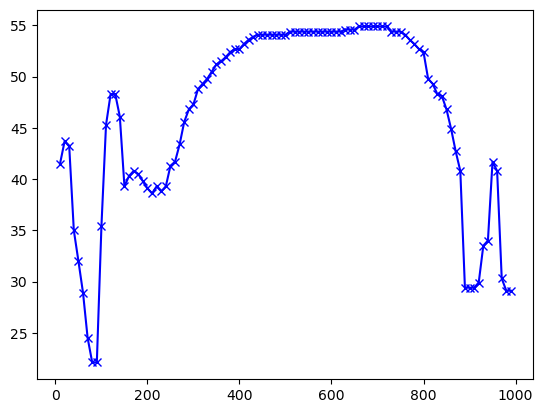

In [ ]:
#tuning k for sklearn
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'access_train.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'access_labels_train.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

percent_anomaly = sum(labels) / len(labels)

best_k = 0
best_score = 0
full_scores = []
for k in range(10, 1000, 10):
        #get result
        lof = LocalOutlierFactor(contamination = percent_anomaly, n_neighbors=k)
        preds = lof.fit_predict(df)
        preds = list(map(lambda x: 0 if x == 1 else 1, preds))

        preds = np.array(preds)
        labels = np.array(labels)

        #calculate f1 score for anomaly class
        diff = preds - labels
        #calculate tp
        tp = len(np.where(((diff == 0) & (labels == 1)))[0])
        #calculate fn
        fn = len(np.where(((diff == -1) & (labels == 1)))[0])
        #calculate fp
        fp = len(np.where(((diff == 1) & (labels == 0)))[0])
        if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
                full_scores.append(0)
                continue
        #calculate precision
        prc = tp / (tp + fp)
        #calculate recall
        rec = tp / (tp + fn)
        #calculate f1 score
        f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

        if f1 > best_score:
                best_score = f1
                best_k = k

        full_scores.append(f1)
        print(f"F1 Score for {k} neighbours: {f1}")

plt.plot(range(10, 1000, 10), full_scores, 'bx-')
plt.show()

In [ ]:
#sklearn with best k
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'access_test.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'access_labels_test.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

percent_anomaly = sum(labels) / len(labels)

#get result
lof = LocalOutlierFactor(contamination = percent_anomaly, n_neighbors = best_k)
start = datetime.now()
preds = lof.fit_predict(df)
stop = datetime.now()
preds = list(map(lambda x: 0 if x == 1 else 1, preds))

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score for {best_k} neighbours: {f1}")

time_diff = round((stop - start).total_seconds(), 1)
print(f"Time taken: {time_diff} seconds")

F1 Score for 660 neighbours: 57.6
Time taken: 0.0 seconds


c:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_lof.py:284: UserWarning: n_neighbors (660) is greater than the total number of samples (509). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


# 11. Energy

In [2]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_11'
RESULT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_11'

## 11.1 Vanilla Attempt

In [ ]:
#preprocessing
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'HRSS_anomalous_optimized.csv'))

#remove timestamp column
del df['Timestamp']

percent_anomaly = df[df['Labels'] == 1].shape[0] / df.shape[0]

print(f"Number of rows: {df.shape[0]}")
print(f"Percentage of anomalies: {round(percent_anomaly * 100, 1)}")

#get labels
labels = df['Labels'].values
del df['Labels']

#normalize all columns
mins = df.min()
maxs = df.max()
df = (df - mins) / (maxs - mins)

print(f"Number of columns: {df.shape[1]}")

df.reset_index(drop = True).to_csv(os.path.join(OUTPUT_DIR, 'energy_full.csv'), header = False)

with open(os.path.join(OUTPUT_DIR, 'energy_labels_full.pickle'), 'wb') as handle:
    pickle.dump(labels, handle)

Number of rows: 19634
Percentage of anomalies: 23.0
Number of columns: 18


In [ ]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_full.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'energy_labels_full.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 5.8
Param n: 4517
Param d: 18


In [57]:
#top n lof
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_full.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'energy_labels_full.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.00125 -d {d} \
-i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_11\\energy_full.csv -k 20 -n {n} \
-o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_11\\energy_full -r {r}", \
    stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

for line in iter(p.stdout.readline, ''): 
    if not line:
        
        break
    print(line.decode('utf-8'))

with open(os.path.join(RESULT_DIR, 'energy_full')) as f:
    preds = f.readlines()

short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
preds = np.zeros(df.shape[0])
preds[short_preds] = 1

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score: {f1}")

Set Arguments.......

K = 20

Top-N = 4517

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\real_world_11\energy_full.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\real_world_11\energy_full

Dim =  18

Domain Range =  5.800000190734863

Cluster Radius Rate =  0.00125

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 5808

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 2 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 146

Number of Pruned Points: 794

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned Po

In [58]:
#sklearn
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_full.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'energy_labels_full.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
lof = LocalOutlierFactor(contamination = percent_anomaly)
start = datetime.now()
preds = lof.fit_predict(df)
stop = datetime.now()
preds = list(map(lambda x: 0 if x == 1 else 1, preds))

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score: {f1}")

time_diff = round((stop - start).total_seconds(), 1)
print(f"Time taken: {time_diff} seconds")

F1 Score: 34.2
Time taken: 3.4 seconds


## 11.2 Tuning k

In [59]:
#preprocessing
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'HRSS_anomalous_optimized.csv'))

# train test split
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 2022, stratify = df['Labels'])

#remove timestamp column
del train_df['Timestamp']
del test_df['Timestamp']

#get labels
train_labels = train_df['Labels'].values
del train_df['Labels']

test_labels = test_df['Labels'].values
del test_df['Labels']

#normalize all columns
mins = train_df.min()
maxs = train_df.max()
train_df = (train_df - mins) / (maxs - mins)
test_df = (test_df - mins) / (maxs - mins)

train_df.reset_index(drop = True).to_csv(os.path.join(OUTPUT_DIR, 'energy_train.csv'), header = False)
test_df.reset_index(drop = True).to_csv(os.path.join(OUTPUT_DIR, 'energy_test.csv'), header = False)

with open(os.path.join(OUTPUT_DIR, 'energy_labels_train.pickle'), 'wb') as handle:
    pickle.dump(train_labels, handle)
with open(os.path.join(OUTPUT_DIR, 'energy_labels_test.pickle'), 'wb') as handle:
    pickle.dump(test_labels, handle)

### Tuning k for top n lof

In [61]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_train.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'energy_labels_train.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 5.9
Param n: 3162
Param d: 18


F1 Score for 10 neighbours: 29.6
F1 Score for 20 neighbours: 30.9
F1 Score for 30 neighbours: 31.4
F1 Score for 40 neighbours: 31.3
F1 Score for 50 neighbours: 31.8
F1 Score for 60 neighbours: 31.3
F1 Score for 70 neighbours: 31.8
F1 Score for 80 neighbours: 31.5
F1 Score for 90 neighbours: 31.3
F1 Score for 100 neighbours: 31.4
F1 Score for 110 neighbours: 32.0
F1 Score for 120 neighbours: 31.4
F1 Score for 130 neighbours: 30.2
F1 Score for 140 neighbours: 29.5
F1 Score for 150 neighbours: 29.5
F1 Score for 160 neighbours: 29.2
F1 Score for 170 neighbours: 28.9
F1 Score for 180 neighbours: 28.8
F1 Score for 190 neighbours: 28.4
F1 Score for 200 neighbours: 28.9
F1 Score for 210 neighbours: 28.9
F1 Score for 220 neighbours: 28.7
F1 Score for 230 neighbours: 28.6
F1 Score for 240 neighbours: 28.4
F1 Score for 250 neighbours: 28.3
F1 Score for 260 neighbours: 28.2
F1 Score for 270 neighbours: 27.9
F1 Score for 280 neighbours: 27.7
F1 Score for 290 neighbours: 27.6
F1 Score for 300 neighb

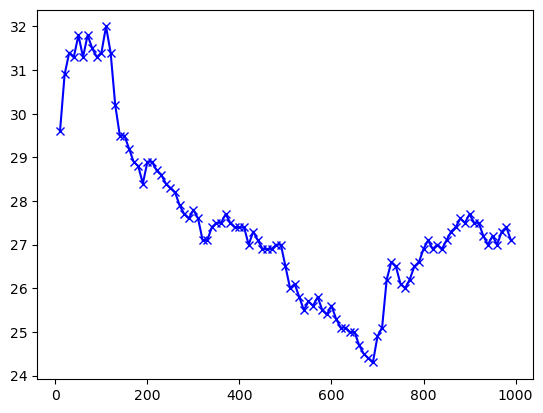

In [62]:
#tune k on top n lof

best_k = 0
best_score = 0
full_scores = []
for k in range(10, 1000, 10):
        #get result
        subprocess.call(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.00125 -d {d} \
        -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_11\\energy_train.csv -k {k} \
                -n {n} \
        -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_11\\energy_train -r {r}", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

        with open(os.path.join(RESULT_DIR, 'energy_train')) as f:
                preds = f.readlines()

        short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
        preds = np.zeros(df.shape[0])
        preds[short_preds] = 1

        preds = np.array(preds)
        labels = np.array(labels)

        #calculate f1 score for anomaly class
        diff = preds - labels
        #calculate tp
        tp = len(np.where(((diff == 0) & (labels == 1)))[0])
        #calculate fn
        fn = len(np.where(((diff == -1) & (labels == 1)))[0])
        #calculate fp
        fp = len(np.where(((diff == 1) & (labels == 0)))[0])
        if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
                full_scores.append(0)
                continue
        #calculate precision
        prc = tp / (tp + fp)
        #calculate recall
        rec = tp / (tp + fn)
        #calculate f1 score
        f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

        if f1 > best_score:
                best_score = f1
                best_k = k

        full_scores.append(f1)
        print(f"F1 Score for {k} neighbours: {f1}")

plt.plot(range(10, 1000, 10), full_scores, 'bx-')
plt.show()

In [63]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_test.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'energy_labels_test.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 5.4
Param n: 1355
Param d: 18


In [65]:
#top n lof with best k
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_test.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'energy_labels_test.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.00125 -d {d} \
-i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_11\\energy_test.csv -k {best_k} \
    -n {n} \
-o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_11\\energy_test -r {r}", \
    stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

for line in iter(p.stdout.readline, ''): 
    if not line:
        break
    print(line.decode('utf-8'))

with open(os.path.join(RESULT_DIR, 'energy_test')) as f:
    preds = f.readlines()

short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
preds = np.zeros(df.shape[0])
preds[short_preds] = 1

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score for {best_k} neighbours: {f1}")

Set Arguments.......

K = 110

Top-N = 1355

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\real_world_11\energy_test.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\real_world_11\energy_test

Dim =  18

Domain Range =  5.400000095367432

Cluster Radius Rate =  0.00125

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 3901

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 1 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 1742

Number of Pruned Points: 1120

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpruned

### Tuning k for sklearn

F1 Score for 10 neighbours: 32.6
F1 Score for 20 neighbours: 33.0
F1 Score for 30 neighbours: 33.3
F1 Score for 40 neighbours: 33.7
F1 Score for 50 neighbours: 33.6
F1 Score for 60 neighbours: 33.5
F1 Score for 70 neighbours: 33.8
F1 Score for 80 neighbours: 33.6
F1 Score for 90 neighbours: 33.4
F1 Score for 100 neighbours: 33.5
F1 Score for 110 neighbours: 33.4
F1 Score for 120 neighbours: 33.5
F1 Score for 130 neighbours: 32.5
F1 Score for 140 neighbours: 31.8
F1 Score for 150 neighbours: 31.7
F1 Score for 160 neighbours: 31.3
F1 Score for 170 neighbours: 30.9
F1 Score for 180 neighbours: 30.7
F1 Score for 190 neighbours: 30.5
F1 Score for 200 neighbours: 30.7
F1 Score for 210 neighbours: 30.8
F1 Score for 220 neighbours: 30.8
F1 Score for 230 neighbours: 30.4
F1 Score for 240 neighbours: 30.2
F1 Score for 250 neighbours: 30.3
F1 Score for 260 neighbours: 30.0
F1 Score for 270 neighbours: 30.0
F1 Score for 280 neighbours: 30.0
F1 Score for 290 neighbours: 30.0
F1 Score for 300 neighb

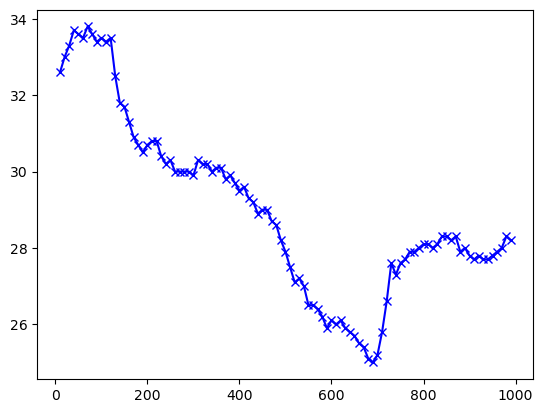

In [66]:
#tuning k for sklearn
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_train.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'energy_labels_train.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

percent_anomaly = sum(labels) / len(labels)

best_k = 0
best_score = 0
full_scores = []
for k in range(10, 1000, 10):
        #get result
        lof = LocalOutlierFactor(contamination = percent_anomaly, n_neighbors=k)
        preds = lof.fit_predict(df)
        preds = list(map(lambda x: 0 if x == 1 else 1, preds))

        preds = np.array(preds)
        labels = np.array(labels)

        #calculate f1 score for anomaly class
        diff = preds - labels
        #calculate tp
        tp = len(np.where(((diff == 0) & (labels == 1)))[0])
        #calculate fn
        fn = len(np.where(((diff == -1) & (labels == 1)))[0])
        #calculate fp
        fp = len(np.where(((diff == 1) & (labels == 0)))[0])
        if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
                full_scores.append(0)
                continue
        #calculate precision
        prc = tp / (tp + fp)
        #calculate recall
        rec = tp / (tp + fn)
        #calculate f1 score
        f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

        if f1 > best_score:
                best_score = f1
                best_k = k

        full_scores.append(f1)
        print(f"F1 Score for {k} neighbours: {f1}")

plt.plot(range(10, 1000, 10), full_scores, 'bx-')
plt.show()

In [67]:
#sklearn with best k
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_test.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'energy_labels_test.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

percent_anomaly = sum(labels) / len(labels)

#get result
lof = LocalOutlierFactor(contamination = percent_anomaly, n_neighbors = best_k)
start = datetime.now()
preds = lof.fit_predict(df)
stop = datetime.now()
preds = list(map(lambda x: 0 if x == 1 else 1, preds))

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score for {best_k} neighbours: {f1}")

time_diff = round((stop - start).total_seconds(), 1)
print(f"Time taken: {time_diff} seconds")

F1 Score for 70 neighbours: 31.1
Time taken: 0.7 seconds


## 11.3 Alternative approach to hyperparameter tuning

In [4]:
#get data
train_df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_train.csv'), header = None)
train_df = train_df.iloc[:, 1:].values
test_df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_test.csv'), header = None)
test_df = test_df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'energy_labels_train.pickle'), 'rb') as handle:
        train_labels = pickle.load(handle)
with open(os.path.join(OUTPUT_DIR, 'energy_labels_test.pickle'), 'rb') as handle:
        test_labels = pickle.load(handle)

### Tuning for Top N LOF

In [5]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_train.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'energy_labels_train.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 5.9
Param n: 3162
Param d: 18


In [17]:
def bo(k, c):
    k = int(k)
    subprocess.call(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c {c} -d {d} \
    -i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_11\\energy_train.csv -k {k} -n {n} \
    -o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_11\\energy_train -r {r}", \
        cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

    with open(os.path.join(RESULT_DIR, 'energy_train')) as f:
        preds = f.readlines()

    with open(os.path.join(OUTPUT_DIR, 'energy_labels_train.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

    short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
    preds = np.zeros(df.shape[0])
    preds[short_preds] = 1

    preds = np.array(preds)
    labels = np.array(labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        print(0)
    #calculate precision
    prc = tp / (tp + fp)
    #calculate recall
    rec = tp / (tp + fn)
    #calculate f1 score
    f1 = 2 * (prc * rec) / (prc + rec) * 100

    return f1

params = {'k': (1e-10, 1000), 'c': (1e-10, 1)}

bo = BayesianOptimization.BayesianOptimization(bo, params, random_state = 1234)
bo.maximize(n_iter = 1000)

|   iter    |  target   |     c     |     k     |
-------------------------------------------------
| 1         | 26.09     | 0.1915    | 622.1     |
| 2         | 28.05     | 0.4377    | 785.4     |
| 3         | 29.98     | 0.78      | 272.6     |
| 4         | 27.96     | 0.2765    | 801.9     |
| 5         | 28.15     | 0.9581    | 875.9     |
| 6         | 30.8      | 0.8576    | 173.4     |
| 7         | 32.73     | 0.09255   | 30.23     |
| 8         | 32.73     | 1e-10     | 1e-10     |
| 9         | 33.36     | 0.9901    | 72.31     |
| 10        | 33.36     | 1e-10     | 413.1     |
| 11        | 28.56     | 1.0       | 471.3     |
| 12        | 29.41     | 0.6707    | 412.2     |
| 13        | 28.4      | 0.09122   | 852.1     |
| 14        | 30.8      | 0.7928    | 173.4     |
| 15        | 28.78     | 0.1034    | 414.1     |
| 16        | 33.36     | 0.4938    | 72.52     |
| 17        | 33.36     | 0.952     | 72.99     |
| 18        | 33.65     | 0.4337    | 71.37     |


KeyboardInterrupt: 

In [19]:
params = bo.max['params']

k = int(params['k'])
c = params['c']

print(params)

{'c': 0.15797769426300814, 'k': 51.407537769737104}


In [20]:
#calculate r
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_test.csv'), header = None)
df = df.iloc[:, 1:]
pts = df.values

centre = df.mean().values
centre = np.tile(centre, (pts.shape[0], 1))
diffs = pts - centre
diffs = np.square(diffs)
diffs = np.sum(diffs, axis = 1)
diffs = np.sqrt(diffs)

idx = np.argmax(diffs)
pt = diffs[idx]

dist = pt - centre
dist = np.square(dist)
dist = np.sum(dist, axis = 1)
r = round(np.sqrt(dist)[0], 1)

print(f"Param r: {r}")

#calculate n
with open(os.path.join(OUTPUT_DIR, 'energy_labels_test.pickle'), 'rb') as handle:
        labels = pickle.load(handle)
percent_anomaly = sum(labels) / len(labels)
n = int(percent_anomaly * df.shape[0])
print(f"Param n: {n}")

#find d
d = df.shape[1]
print(f"Param d: {d}")

Param r: 5.4
Param n: 1355
Param d: 18


In [21]:
#top n lof
#read data
df = pd.read_csv(os.path.join(OUTPUT_DIR, 'energy_test.csv'), header = None)
df = df.iloc[:, 1:].values

with open(os.path.join(OUTPUT_DIR, 'energy_labels_test.pickle'), 'rb') as handle:
        labels = pickle.load(handle)

#get result
p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c {c} -d {d} \
-i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\real_world_11\\energy_test.csv -k {k} -n {n} \
-o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\real_world_11\\energy_test -r {r}", \
    stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

for line in iter(p.stdout.readline, ''): 
    if not line:
        
        break
    print(line.decode('utf-8'))

with open(os.path.join(RESULT_DIR, 'energy_test')) as f:
    preds = f.readlines()

short_preds = list(map(lambda x: int(x.split(',')[0]), preds))
preds = np.zeros(df.shape[0])
preds[short_preds] = 1

preds = np.array(preds)
labels = np.array(labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score: {f1}")

Set Arguments.......

K = 51

Top-N = 1355

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\real_world_11\energy_test.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\real_world_11\energy_test

Dim =  18

Domain Range =  5.400000095367432

Cluster Radius Rate =  0.15797769426300814

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 17

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 0 seconds.............

..............End Computing Kdistance Bounds..............

..............End Computing LOF Bounds..............

Number of Pruned Clusters: 0

Number of Pruned Points: 0

..............End Removing Micro Clusters..............

...............Start Computing KNN for Unpru

### Tuning for Sklearn

In [27]:
def bo(n_neighbors):
    params = {}
    params['n_neighbors'] = int(n_neighbors)

    lof = LocalOutlierFactor(contamination = percent_anomaly, **params)

    preds = lof.fit_predict(train_df)
    preds = list(map(lambda x: 0 if x == 1 else 1, preds))

    preds = np.array(preds)
    labels = np.array(train_labels)

    #calculate f1 score for anomaly class
    diff = preds - labels
    #calculate tp
    tp = len(np.where(((diff == 0) & (labels == 1)))[0])
    #calculate fn
    fn = len(np.where(((diff == -1) & (labels == 1)))[0])
    #calculate fp
    fp = len(np.where(((diff == 1) & (labels == 0)))[0])
    if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
        f1 = 0
    else:
        #calculate precision
        prc = tp / (tp + fp)
        #calculate recall
        rec = tp / (tp + fn)
        #calculate f1 score
        f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)
    return f1

params = {'n_neighbors': (1 + 1e-10, 1000)}

bo = BayesianOptimization.BayesianOptimization(bo, params, random_state = 1234)
bo.maximize(n_iter = 1000)

|   iter    |  target   | n_neig... |
-------------------------------------
| 1         | 30.7      | 192.3     |
| 2         | 26.0      | 622.5     |
| 3         | 29.0      | 438.3     |
| 4         | 28.1      | 785.6     |
| 5         | 27.9      | 780.2     |
| 6         | 29.8      | 269.2     |
| 7         | 33.5      | 86.69     |
| 8         | 14.5      | 1.0       |
| 9         | 33.4      | 87.9      |
| 10        | 30.0      | 349.1     |
| 11        | 27.9      | 892.1     |
| 12        | 28.2      | 999.9     |
| 13        | 27.3      | 514.2     |
| 14        | 31.9      | 145.6     |
| 15        | 25.2      | 700.8     |
| 16        | 29.8      | 392.1     |
| 17        | 27.7      | 946.7     |
| 18        | 28.1      | 841.4     |
| 19        | 30.3      | 308.7     |
| 20        | 30.5      | 229.0     |
| 21        | 33.2      | 66.07     |
| 22        | 26.4      | 566.5     |
| 23        | 33.6      | 75.81     |
| 24        | 31.0      | 166.1     |
| 25        

In [29]:
params = bo.max['params']

n_neighbors = int(params['n_neighbors'])

print(params)

{'n_neighbors': 26.348438390421258}


In [30]:
#sklearn

#get result
lof = LocalOutlierFactor(contamination = percent_anomaly, n_neighbors= n_neighbors)
start = datetime.now()
preds = lof.fit_predict(test_df)
stop = datetime.now()
preds = list(map(lambda x: 0 if x == 1 else 1, preds))

preds = np.array(preds)
labels = np.array(test_labels)

#calculate f1 score for anomaly class
diff = preds - labels
#calculate tp
tp = len(np.where(((diff == 0) & (labels == 1)))[0])
#calculate fn
fn = len(np.where(((diff == -1) & (labels == 1)))[0])
#calculate fp
fp = len(np.where(((diff == 1) & (labels == 0)))[0])
if (tp + fp) == 0 or (tp + fn) == 0 or tp == 0:
    print(0)
#calculate precision
prc = tp / (tp + fp)
#calculate recall
rec = tp / (tp + fn)
#calculate f1 score
f1 = round(2 * (prc * rec) / (prc + rec) * 100, 1)

print(f"F1 Score: {f1}")

time_diff = round((stop - start).total_seconds(), 1)
print(f"Time taken: {time_diff} seconds")

F1 Score: 33.2
Time taken: 0.6 seconds


# 12. Comparing runtime for very large datasets

In [2]:
#set directories
OUTPUT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_12'
RESULT_DIR = 'C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_12'

In [3]:
#set the mean and standard deviation of the gaussian distribution for inliers
mu, sigma = 0, 1
#set the mean and standard deviation of the gaussian distribution for outliers
mu2, sigma2 = 10, 10
#set dim to 2 
dim = 2

In [3]:
#create the dataset
def generate_df(size):
        #number of rows
        print(f'Number of rows: {size // 1000000}m')
        num_anomalies = int(0.001 * size)
        num_inliers = size - num_anomalies

        inliers = np.random.normal(mu, sigma, (num_inliers, dim))
        outliers = np.random.normal(mu2, sigma2, (num_anomalies, dim))
        s = np.concatenate([inliers, outliers])
        labels = [0] * num_inliers + [1] * num_anomalies

        df = pd.DataFrame(s)
        df.to_csv(os.path.join(OUTPUT_DIR, 'dim_2.csv'), header = False)

        with open(os.path.join(OUTPUT_DIR, 'labels_dim_2.pickle'), 'wb') as handle:
                pickle.dump(labels, handle)

In [4]:
def calculate_params():
        #calculate r
        df = pd.read_csv(os.path.join(OUTPUT_DIR, 'dim_2.csv'), header = None)
        df = df.iloc[:, 1:]
        pts = df.values

        centre = df.mean().values
        centre = np.tile(centre, (pts.shape[0], 1))
        diffs = pts - centre
        diffs = np.square(diffs)
        diffs = np.sum(diffs, axis = 1)
        diffs = np.sqrt(diffs)

        idx = np.argmax(diffs)
        pt = diffs[idx]

        dist = pt - centre
        dist = np.square(dist)
        dist = np.sum(dist, axis = 1)
        r = round(np.sqrt(dist)[0], 1)

        print(f"Param r: {r}")

        #calculate n
        with open(os.path.join(OUTPUT_DIR, 'labels_dim_2.pickle'), 'rb') as handle:
                labels = pickle.load(handle)
        percent_anomaly = sum(labels) / len(labels)
        n = int(percent_anomaly * df.shape[0])
        print(f"Param n: {n}")

        #find d
        d = df.shape[1]
        print(f"Param d: {d}")

        return r, n, d

In [23]:
#generate df (remember to restart kernel at each step below to make sure we use all ram available)
generate_df(100000000)

Number of rows: 100m


In [6]:
#top n lof
r, n, d = calculate_params()

df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_{d}.csv'), header = None)
df = df.iloc[:, 1:].values

p = subprocess.Popen(f"java -cp lib microcluster.topnlof.TopNLOFDetection -c 0.00125 -d 2 \
-i C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\data\\synthetic_12\\dim_2.csv -k 20 -n {n} \
-o C:\\Users\\User\\Desktop\\DA_toolkit\\open_source_results\\results\\synthetic_12\\dim_2 -r {r}", \
    stdout = subprocess.PIPE, cwd = 'C:\\Users\\User\\Desktop\\DA_toolkit\\TopNLOFKDD-master')

for line in iter(p.stdout.readline, ''): 
    if not line: 
        break
    print(line.decode('utf-8'))

Param r: 80.5
Param n: 100000
Param d: 2
Set Arguments.......

K = 20

Top-N = 100000

Input File Path =  C:\Users\User\Desktop\DA_toolkit\open_source_results\data\synthetic_12\dim_2.csv

Output File Path = C:\Users\User\Desktop\DA_toolkit\open_source_results\results\synthetic_12\dim_2

Dim =  2

Domain Range =  80.5

Cluster Radius Rate =  0.00125

.............Start training CF-Tree..............

.............Start Generating Micro Clusters..............

Size of Micro Clusters: 51578

.............Start Assigning Points to Micro Clusters..............

...................Build a R-Tree for Micro Clusters...........

..............End Preprocessing..............

..............Preprocessing takes 3007 seconds.............



In [7]:
#sklearn
df = pd.read_csv(os.path.join(OUTPUT_DIR, f'dim_2.csv'), header = None)
df = df.iloc[:, 1:].values

lof = LocalOutlierFactor()

start = datetime.now()
lof.fit_predict(df)
stop = datetime.now()

time_diff = round((stop - start).total_seconds(), 1)
print(f"Time taken for sklearn: {time_diff}")

MemoryError: Unable to allocate 14.9 GiB for an array with shape (2000000000,) and data type int64